In [122]:

#import kaggle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# kaggle.api.dataset_download_files("arashnic/hr-analytics-job-change-of-data-scientists", path="./data", unzip=True)

In [123]:
df=pd.read_csv("datasets/hr_analytics_data/aug_train.csv")


In [124]:
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [125]:
df.iloc[0,]

enrollee_id                                  8949
city                                     city_103
city_development_index                       0.92
gender                                       Male
relevent_experience       Has relevent experience
enrolled_university                 no_enrollment
education_level                          Graduate
major_discipline                             STEM
experience                                    >20
company_size                                  NaN
company_type                                  NaN
last_new_job                                    1
training_hours                                 36
target                                        1.0
Name: 0, dtype: object

In [126]:
df["relevent_experience"].unique()

array(['Has relevent experience', 'No relevent experience'], dtype=object)

In [127]:
df["relevent_experience"].replace({"Has relevent experience": 1, "No relevent experience":0},inplace=True)

In [128]:
df["relevent_experience"].unique()

array([1, 0])

In [129]:
df.iloc[0,]

enrollee_id                        8949
city                           city_103
city_development_index             0.92
gender                             Male
relevent_experience                   1
enrolled_university       no_enrollment
education_level                Graduate
major_discipline                   STEM
experience                          >20
company_size                        NaN
company_type                        NaN
last_new_job                          1
training_hours                       36
target                              1.0
Name: 0, dtype: object

In [130]:
df["gender"].unique()

array(['Male', nan, 'Female', 'Other'], dtype=object)

In [131]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [132]:
df["gender"].value_counts(dropna=False) # default dropna is True, which does not count null values

Male      13221
NaN        4508
Female     1238
Other       191
Name: gender, dtype: int64

In [133]:
df.isnull().sum()["gender"]

df["gender"].replace({"Male":1,"Female":2,"Other":3},inplace=True)

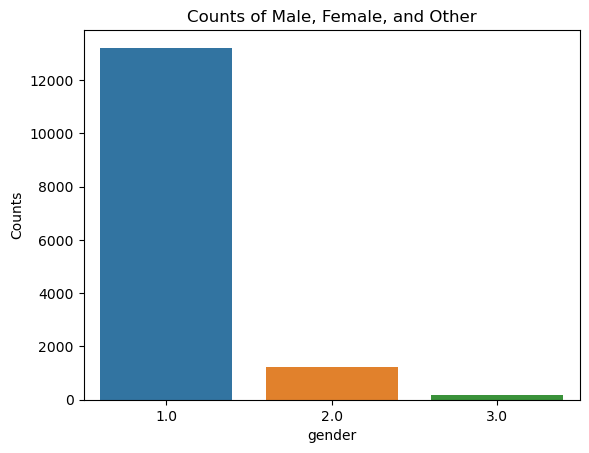

In [134]:

# Group the data by the 'Gender' column and count the number of occurrences
grouped_data = df.groupby(['gender']).size().reset_index(name='Counts')

# Create a bar plot using seaborn
sns.barplot(x=grouped_data['gender'], y=grouped_data['Counts'])

# Add labels and title
plt.xlabel("gender")
plt.ylabel("Counts")
plt.title("Counts of Male, Female, and Other")

# Show the plot
plt.show()


In [136]:
df.iloc[0,]

enrollee_id                        8949
city                           city_103
city_development_index             0.92
gender                              1.0
relevent_experience                   1
enrolled_university       no_enrollment
education_level                Graduate
major_discipline                   STEM
experience                          >20
company_size                        NaN
company_type                        NaN
last_new_job                          1
training_hours                       36
target                              1.0
Name: 0, dtype: object

In [137]:
df["education_level"].unique()

array(['Graduate', 'Masters', 'High School', nan, 'Phd', 'Primary School'],
      dtype=object)

In [138]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
enrollee_id,19158.0,16875.358179,9616.292592,1.000,8554.25,16982.500,25169.75,33380.000
city_development_index,19158.0,0.828848,0.123362,0.448,0.74,0.903,0.92,0.949
gender,14650.0,1.110580,0.352755,1.000,1.00,1.000,1.00,3.000
relevent_experience,19158.0,0.719908,0.449056,0.000,0.00,1.000,1.00,1.000
training_hours,19158.0,65.366896,60.058462,1.000,23.00,47.000,88.00,336.000
target,19158.0,0.249348,0.432647,0.000,0.00,0.000,0.00,1.000


In [139]:
df.describe(include=['O']).T

,count,unique,top,freq
city,19158,123,city_103,4355
enrolled_university,18772,3,no_enrollment,13817
education_level,18698,5,Graduate,11598
major_discipline,16345,6,STEM,14492
experience,19093,22,>20,3286
company_size,13220,8,50-99,3083
company_type,13018,6,Pvt Ltd,9817
last_new_job,18735,6,1,8040


In [28]:
df["enrolled_university"].unique()

array(['no_enrollment', 'Full time course', nan, 'Part time course'],
      dtype=object)

In [29]:
df["experience"].unique()

array(['>20', '15', '5', '<1', '11', '13', '7', '17', '2', '16', '1', '4',
       '10', '14', '18', '19', '12', '3', '6', '9', '8', '20', nan],
      dtype=object)

In [140]:
df["target"].replace({"1":"Yes","0":"No"})
## or another method
df["target"].apply(lambda x: "Yes" if x==1 else "No" )

0        Yes
1         No
2         No
3        Yes
4         No
        ... 
19153    Yes
19154    Yes
19155     No
19156     No
19157     No
Name: target, Length: 19158, dtype: object

In [150]:
df2=df.iloc[:,[13,2]]
df2

,target,city_development_index
0,1.0,0.920
1,0.0,0.776
2,0.0,0.624
3,1.0,0.789
4,0.0,0.767
...,...,...
19153,1.0,0.878
19154,1.0,0.920
19155,0.0,0.920
19156,0.0,0.802


<AxesSubplot: xlabel='target', ylabel='city_development_index'>

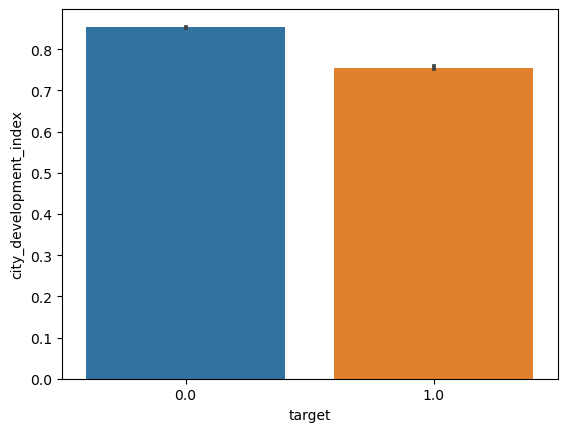

In [153]:
sns.barplot(y='city_development_index',x='target',data=df)

<AxesSubplot: xlabel='A', ylabel='B'>

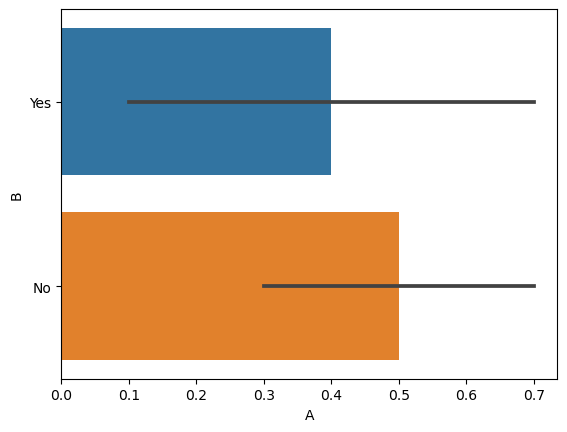

In [149]:
data = {'A': [0.1, 0.3, 0.5, 0.7, 0.9,0.1],
        'B': ['Yes', 'No', 'Yes', 'No', 'Yes','Yes']}
dt = pd.DataFrame(data)
sns.barplot(x='A',y='B',data=dt)

In [143]:
dt

,A,B
0,0.1,Yes
1,0.3,No
2,0.5,Yes
3,0.7,No
4,0.9,Yes
